In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from pathlib import Path
import os
import tensorflow as tf

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vikthour","key":"854772165a20adf6b63b62f944d1936f"}'}

In [3]:
# Create a kaggle folder
! mkdir ~/.kaggle

In [4]:
# Copy the kaggle.json file into the /.kaggle folder
! cp kaggle.json ~/.kaggle/

In [5]:
# Permission for the json to be executed.

!chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d harshwalia/birds-vs-drone-dataset -p Dataset

 86% 67.0M/78.1M [00:00<00:00, 82.3MB/s]
100% 78.1M/78.1M [00:00<00:00, 114MB/s] 


In [9]:
!unzip Dataset/birds-vs-drone-dataset.zip

Archive:  Dataset/birds-vs-drone-dataset.zip
  inflating: BirdVsDrone/Birds/singleBirdinsky0.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky1.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky10.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky100.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky101.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky102.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky103.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky104.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky105.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky106.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky107.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky108.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky109.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky11.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky110.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky111.jpeg  
  inflating: BirdVsDrone/Birds/singleBirdinsky112

In [14]:
# Select the directory
bird_drone_dir_train = Path('/content/BirdVsDrone')

# Create the filepath using the directory
train_filepaths = list(bird_drone_dir_train.glob(r'**/*.jpeg'))

# Select the labels
train_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], train_filepaths))


# Paths and Labels for the trainset
train_filepaths = pd.Series(train_filepaths, name='File').astype(str)
train_labels = pd.Series(train_labels, name='Label')


# Concatenating both the paths and labels for train
train_df = pd.concat([train_filepaths, train_labels], axis=1)

train_df = train_df.sample(frac=1, random_state = 42).reset_index(drop= True)

In [15]:
train_df.head()

,File,Label
0,/content/BirdVsDrone/Birds/singleBirdinsky336....,Birds
1,/content/BirdVsDrone/Birds/singleBirdinsky287....,Birds
2,/content/BirdVsDrone/Birds/singleBirdinsky38.jpeg,Birds
3,/content/BirdVsDrone/Birds/singleBirdinsky241....,Birds
4,/content/BirdVsDrone/Birds/singleBirdinsky206....,Birds


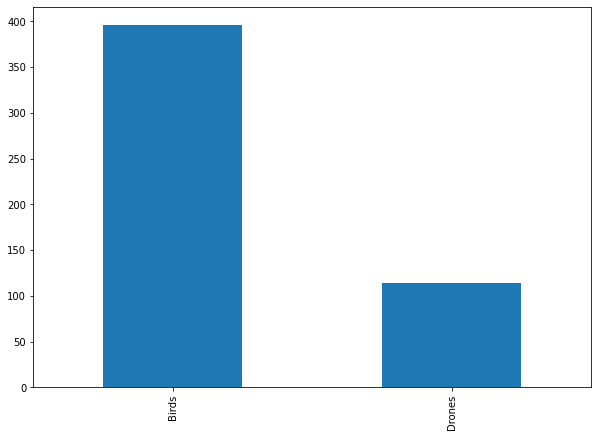

In [18]:
plt.figure(figsize=(10, 7))
train_df.Label.value_counts().plot(kind='bar')

Text(0.5, 0, '(183, 275, 3)')

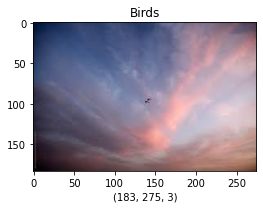

In [19]:
plt.figure(figsize=(4, 4))
x = plt.imread(train_df['File'][20])
plt.imshow(x)
plt.title(train_df.Label[20])
plt.xlabel(x.shape)

<Figure size 720x720 with 0 Axes>

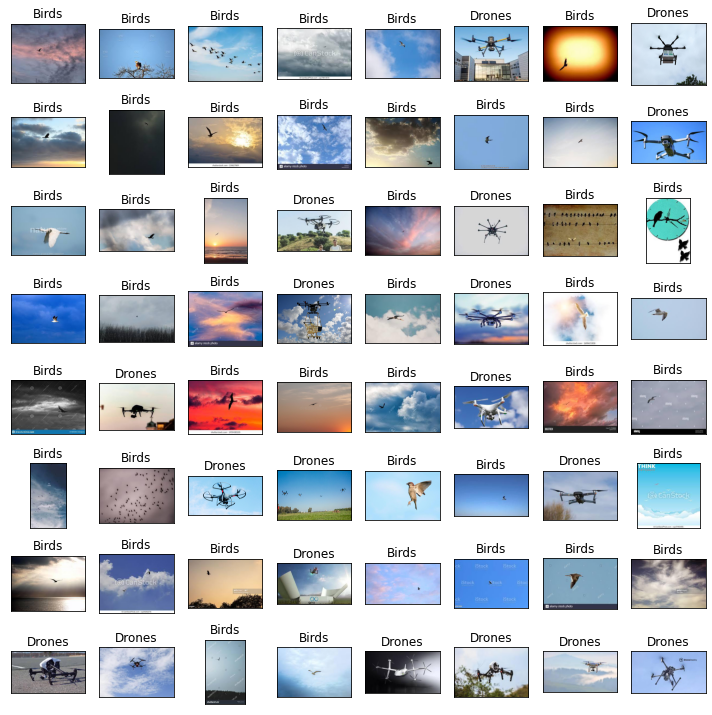

In [20]:
plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(8, 8, figsize=(10, 10),
                         subplot_kw = {"xticks": [], "yticks": []})

for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(train_df['File'][i]))
  ax.set_title(train_df['Label'][i])
plt.tight_layout()
plt.show()

In [21]:
batch_size = 64
image_height = 256
image_width = 256

In [37]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(bird_drone_dir_train, seed= 42, 
                                                                image_size= (image_height, image_width), batch_size = batch_size,
                                                                validation_split = 0.15, subset = "training")

val_set = tf.keras.preprocessing.image_dataset_from_directory(bird_drone_dir_train, seed= 42, 
                                                                image_size= (image_height, image_width), batch_size = batch_size,
                                                                validation_split = 0.15, subset = "validation")

Found 826 files belonging to 2 classes.
Using 703 files for training.
Found 826 files belonging to 2 classes.
Using 123 files for validation.


In [45]:
# Write the model
num_classes = len(train_set.class_names)

model = tf.keras.Sequential([
                             tf.keras.layers.Rescaling(1./255),
                             tf.keras.layers.Conv2D(32, 3, activation= 'relu'),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Conv2D(32, 3, activation= 'relu'),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation= 'relu'),
                             tf.keras.layers.Dense(64, activation= 'relu'),
                             tf.keras.layers.Dense(32, activation= 'relu'),
                             tf.keras.layers.Dense(1, activation= 'sigmoid')

])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss= tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(train_set, validation_data= val_set, epochs= 10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 55s 5s/step - loss: 1.2154 - accuracy: 0.5263 - val_loss: 0.6061 - val_accuracy: 0.6098
Epoch 2/10
11/11 [==============================] - 53s 5s/step - loss: 0.5195 - accuracy: 0.7610 - val_loss: 0.4856 - val_accuracy: 0.7805
Epoch 3/10
11/11 [==============================] - 52s 4s/step - loss: 0.4174 - accuracy: 0.8151 - val_loss: 0.4424 - val_accuracy: 0.7967
Epoch 4/10
11/11 [==============================] - 52s 5s/step - loss: 0.3300 - accuracy: 0.8706 - val_loss: 0.4166 - val_accuracy: 0.8130
Epoch 5/10
11/11 [==============================] - 53s 5s/step - loss: 0.2384 - accuracy: 0.9147 - val_loss: 0.4668 - val_accuracy: 0.8049
Epoch 6/10
11/11 [==============================] - 54s 5s/step - loss: 0.1805 - accuracy: 0.9346 - val_loss: 0.4839 - val_accuracy: 0.8211
Epoch 7/10
11/11 [==============================] - 54s 5s/step - loss: 0.1551 - accuracy: 0.9445 - val_loss: 0.5320 - val_accuracy: 0.8130
Epoch 8/10
11/11 [=============

In [46]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f75c36aa0d0>>

Save the Model

In [47]:
model.save('Bird_or_Drone_model')

INFO:tensorflow:Assets written to: Bird_or_Drone_model/assets


In [48]:
model.save('Bird_or_Drone_model.h5')